In [1]:
%%capture
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
news_df = pd.read_csv('online-news-popularity-ceu-ml-2024/train.csv')
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      29733 non-null  int64  
 1   n_tokens_title                 29733 non-null  int64  
 2   n_tokens_content               29733 non-null  int64  
 3   n_unique_tokens                29733 non-null  float64
 4   n_non_stop_words               29733 non-null  float64
 5   n_non_stop_unique_tokens       29733 non-null  float64
 6   num_hrefs                      29733 non-null  int64  
 7   num_self_hrefs                 29733 non-null  int64  
 8   num_imgs                       29733 non-null  int64  
 9   num_videos                     29733 non-null  int64  
 10  average_token_length           29733 non-null  float64
 11  num_keywords                   29733 non-null  int64  
 12  data_channel_is_lifestyle      29733 non-null 

In [3]:
news_df.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,is_popular,article_id
0,594,9,702,0.454545,1.0,0.620438,11,2,1,0,...,1.000000,-0.153395,-0.4,-0.100000,0.000000,0.000000,0.500000,0.000000,0,1
1,346,8,1197,0.470143,1.0,0.666209,21,6,2,13,...,1.000000,-0.308167,-1.0,-0.100000,0.000000,0.000000,0.500000,0.000000,0,3
2,484,9,214,0.618090,1.0,0.748092,5,2,1,0,...,0.433333,-0.141667,-0.2,-0.050000,0.000000,0.000000,0.500000,0.000000,0,5
3,639,8,249,0.621951,1.0,0.664740,16,5,8,0,...,0.500000,-0.500000,-0.8,-0.400000,0.000000,0.000000,0.500000,0.000000,0,6
4,177,12,1219,0.397841,1.0,0.583578,21,1,1,2,...,0.800000,-0.441111,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000,0,7
5,568,7,126,0.723577,1.0,0.774194,3,3,1,0,...,0.285714,0.000000,0.0,0.000000,0.454545,0.136364,0.045455,0.136364,0,8
6,318,12,1422,0.367994,1.0,0.469256,28,28,26,0,...,0.700000,-0.234167,-0.5,-0.050000,1.000000,0.100000,0.500000,0.100000,0,9
7,582,6,1102,0.451287,1.0,0.642089,7,3,1,0,...,0.800000,-0.151630,-0.4,-0.050000,0.800000,0.400000,0.300000,0.400000,1,11
8,269,9,0,0.000000,0.0,0.000000,0,0,5,0,...,0.000000,0.000000,0.0,0.000000,0.500000,0.500000,0.000000,0.500000,0,12
9,567,7,94,0.755319,1.0,0.812500,8,6,0,11,...,1.000000,-0.183333,-0.2,-0.166667,0.000000,0.000000,0.500000,0.000000,0,14


Data Cleaning

In [4]:
news_df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,29733.0,355.645646,214.288261,8.0,164.000000,342.000000,545.000000,731.0
n_tokens_title,29733.0,10.390812,2.110135,2.0,9.000000,10.000000,12.000000,23.0
n_tokens_content,29733.0,545.008274,469.358037,0.0,246.000000,409.000000,712.000000,8474.0
n_unique_tokens,29733.0,0.555076,4.064572,0.0,0.471400,0.539894,0.609375,701.0
n_non_stop_words,29733.0,1.005852,6.039655,0.0,1.000000,1.000000,1.000000,1042.0
...,...,...,...,...,...,...,...,...
title_sentiment_polarity,29733.0,0.069691,0.264379,-1.0,0.000000,0.000000,0.136364,1.0
abs_title_subjectivity,29733.0,0.341427,0.188735,0.0,0.166667,0.500000,0.500000,0.5
abs_title_sentiment_polarity,29733.0,0.155234,0.225066,0.0,0.000000,0.000000,0.250000,1.0
is_popular,29733.0,0.121649,0.326886,0.0,0.000000,0.000000,0.000000,1.0


In [5]:
# news_df[(news_df.n_tokens_content == 0) & (news_df.num_imgs == 0) & (news_df.num_videos == 0)]
news_df[(news_df.n_tokens_content == 0) & (news_df.num_self_hrefs > 0)]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,is_popular,article_id


EDA

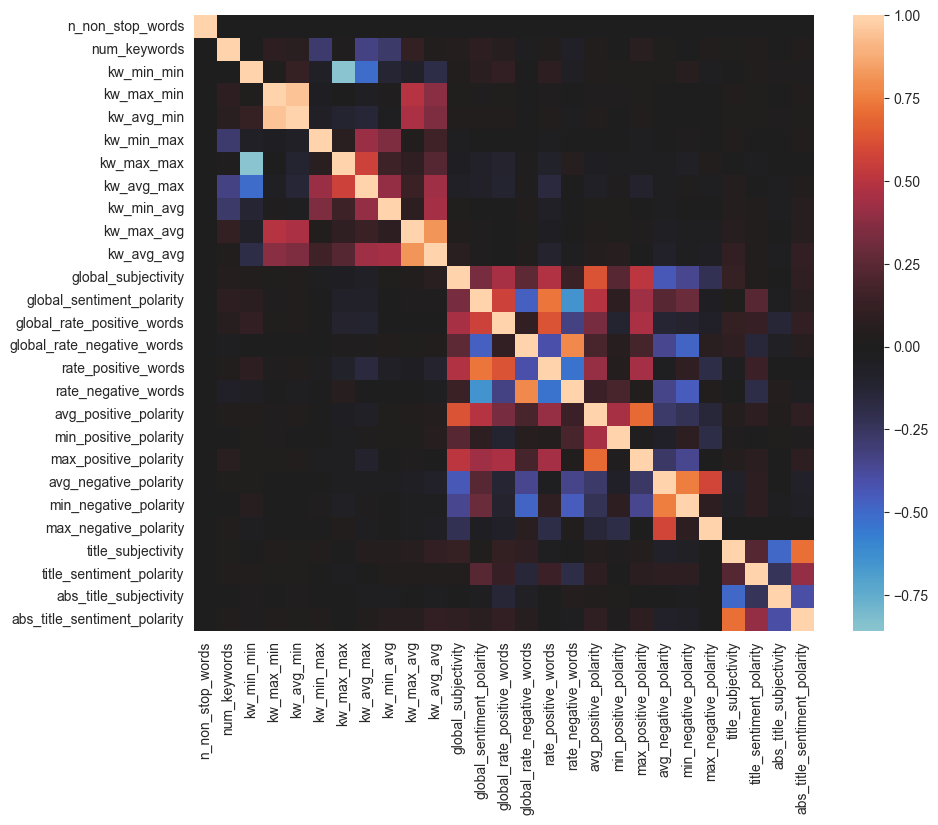

In [6]:
# correlation check 
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = news_df[[col for col in news_df.columns if col.startswith('kw_') or 'word' in col or 'polarity' in col or 'subjectivity' in col]].corr()
# plot_data = news_df.drop(columns=['timedelta', 'is_popular', 'article_id']).corr()
labs = plot_data.columns

corr_plt, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(plot_data, xticklabels=labs, yticklabels=labs, center=0, ax=ax)
corr_plt.show()

In [7]:
plot_data = news_df.drop(columns=['timedelta', 'is_popular', 'article_id']).corr()
test = plot_data.applymap(lambda x: 1 if x >= 0.8 else -1 if x <= -0.8 else 0)

high_correlation_pairs = []
for row_index, row in test.iterrows():
    for column_name, cell_value in row.items():
        if (cell_value == 1 or cell_value == -1) and row_index != column_name and (row_index + '*' + column_name not in high_correlation_pairs and column_name + '*' + row_index not in high_correlation_pairs):
            high_correlation_pairs.append(row_index + '*' + column_name)
high_correlation_pairs = [(x.split('*')[0], x.split('*')[1]) for x in high_correlation_pairs]
high_correlation_pairs

[('n_unique_tokens', 'n_non_stop_words'),
 ('n_unique_tokens', 'n_non_stop_unique_tokens'),
 ('n_non_stop_words', 'n_non_stop_unique_tokens'),
 ('data_channel_is_world', 'LDA_02'),
 ('kw_min_min', 'kw_max_max'),
 ('kw_max_min', 'kw_avg_min'),
 ('kw_max_avg', 'kw_avg_avg'),
 ('self_reference_min_shares', 'self_reference_avg_sharess'),
 ('self_reference_max_shares', 'self_reference_avg_sharess')]

In [8]:
from sklearn.model_selection import train_test_split

exclude_cols = ['timedelta', 'is_popular', 'article_id', 'kw_min_min', 'kw_max_min', 'kw_max_avg', 'n_non_stop_unique_tokens', 'self_reference_min_shares', 'self_reference_max_shares'] + [col for col in news_df.columns if col.startswith('weekday_is_')] + [col for col in news_df.columns if col.startswith('data_channel_is')]

# split data to train & val & test
outcome = news_df["is_popular"]
features = news_df.drop(columns=exclude_cols)
prng = np.random.RandomState(20240408)
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=prng)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=prng)

print(X_train.shape, X_val.shape, X_test.shape)

(21407, 39) (2379, 39) (5947, 39)


Simple Logit

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# no regularisation needed so setting the parameter to very high value
Cs_value_logit = [1e20]
scoring='roc_auc'

logit_model = LogisticRegressionCV(
        Cs=Cs_value_logit,
        refit=True, 
        scoring=scoring, 
        solver="liblinear", 
        tol=1e-7, 
        random_state=prng
    )

logit_model.fit(X_train, y_train)

summary_df = pd.DataFrame({'Model': ['Logit as Benchmark'],
                           'Train AUC': [round(roc_auc_score(y_train, logit_model.predict_proba(X_train)[:,1]), 4)],
                           'Val AUC': [round(roc_auc_score(y_val, logit_model.predict_proba(X_val)[:,1]), 4)],
                           'Test AUC': [round(roc_auc_score(y_test, logit_model.predict_proba(X_test)[:,1]), 4)],
                           # 'Train accuracy': [round(accuracy_score(y_train, logit_model.predict(X_train)), 4)],
                           # 'Val accuracy': [round(accuracy_score(y_val, logit_model.predict(X_val)), 4)],
                           # 'Test accuracy': [round(accuracy_score(y_test, logit_model.predict(X_test)), 4)],
                           # 'Train F1 score': [round(f1_score(y_train, logit_model.predict(X_train)), 4)],
                           # 'Val F1 score': [round(f1_score(y_val, logit_model.predict(X_val)), 4)],
                           # 'Test F1 score': [round(f1_score(y_test, logit_model.predict(X_test)), 4)],
                          })
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404


Feature Engineering

In [10]:
def feature_engineer(df):
    # normalized unique tokens and keywords
    # df['e_unique_tokens_normalized'] = df.apply(lambda x: x['n_unique_tokens'] / x['n_tokens_content'] if x['n_tokens_content'] > 0 else 0, axis=1)
    # df['e_non_stop_unique_tokens_normalized'] = df.apply(lambda x: x['n_non_stop_unique_tokens'] / x['n_tokens_content'] if x['n_tokens_content'] > 0 else 0, axis=1)
    df['e_keyword_density'] = df.apply(lambda x: x['num_keywords'] / x['n_tokens_content'] if x['n_tokens_content'] > 0 else x['num_keywords'], axis=1)
    df['e_title_length_ratio'] = df.apply(lambda x: x['n_tokens_title'] / x['n_tokens_content'] if x['n_tokens_content'] > 0 else x['n_tokens_title'], axis=1)
    
    # links ratio
    df['e_external_link_ratio'] = df.apply(lambda x: x['num_hrefs'] / x['n_tokens_content'] if x['n_tokens_content'] > 0 else x['num_hrefs'], axis=1)
    df['e_self_reference_link_ratio'] = df.apply(lambda x: x['num_self_hrefs'] / x['num_hrefs'] if x['num_hrefs'] > 0 else x['num_self_hrefs'], axis=1)
    
    # media ratio
    df['e_multimedia_content_ratio'] = df.apply(lambda x: (x['num_imgs'] + x['num_videos']) / x['n_tokens_content'] if x['n_tokens_content'] > 0 else (x['num_imgs'] + x['num_videos']), axis=1)
    
    # composite indicators of sentiment balance or emotional intensity
    df['e_sentiment_balance'] = df['global_rate_positive_words'] - df['global_rate_negative_words']
    df['e_emotional_intensity'] = df['global_sentiment_polarity'] * df['global_subjectivity']
    
    # count of channels associated with each article
    channel_cols = [col for col in news_df.columns if col.startswith('data_channel_is')]
    df['e_num_channels'] = df[channel_cols].sum(axis=1)
    df['e_is_multi_channel'] = df['e_num_channels'].apply(lambda x: 1 if x > 1 else 0)
    
    binary_cols = ['is_weekend', 'e_is_multi_channel']
    
    return df, binary_cols

news_df, binary_cols = feature_engineer(news_df)

In [11]:
plot_data = news_df.drop(columns=['timedelta', 'is_popular', 'article_id']).corr()
test = plot_data.applymap(lambda x: 1 if x >= 0.8 else -1 if x <= -0.8 else 0)

high_correlation_pairs = []
for row_index, row in test.iterrows():
    for column_name, cell_value in row.items():
        if (cell_value == 1 or cell_value == -1) and row_index != column_name and (row_index + '*' + column_name not in high_correlation_pairs and column_name + '*' + row_index not in high_correlation_pairs):
            high_correlation_pairs.append(row_index + '*' + column_name)
high_correlation_pairs = [(x.split('*')[0], x.split('*')[1]) for x in high_correlation_pairs]
high_correlation_pairs

[('n_unique_tokens', 'n_non_stop_words'),
 ('n_unique_tokens', 'n_non_stop_unique_tokens'),
 ('n_non_stop_words', 'n_non_stop_unique_tokens'),
 ('average_token_length', 'e_keyword_density'),
 ('average_token_length', 'e_title_length_ratio'),
 ('data_channel_is_world', 'LDA_02'),
 ('kw_min_min', 'kw_max_max'),
 ('kw_max_min', 'kw_avg_min'),
 ('kw_max_avg', 'kw_avg_avg'),
 ('self_reference_min_shares', 'self_reference_avg_sharess'),
 ('self_reference_max_shares', 'self_reference_avg_sharess'),
 ('global_sentiment_polarity', 'e_emotional_intensity'),
 ('global_rate_positive_words', 'e_sentiment_balance'),
 ('e_keyword_density', 'e_title_length_ratio')]

In [12]:
# exclude_cols_tmp = ['n_non_stop_words','kw_min_min','kw_max_min','kw_max_avg','self_reference_min_shares','self_reference_max_shares','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','max_positive_polarity','min_negative_polarity','abs_title_sentiment_polarity'] + [col for col in news_df.columns if col.startswith('data_channel_is')]
exclude_cols_tmp = ['average_token_length','global_sentiment_polarity','global_rate_negative_words', 'e_title_length_ratio']
[exclude_cols.append(x) for x in exclude_cols_tmp if x not in exclude_cols]
exclude_cols

['timedelta',
 'is_popular',
 'article_id',
 'kw_min_min',
 'kw_max_min',
 'kw_max_avg',
 'n_non_stop_unique_tokens',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'average_token_length',
 'global_sentiment_polarity',
 'global_rate_negative_words',
 'e_title_length_ratio']

In [13]:
# split train, val, test again with engineered features
outcome = news_df["is_popular"]
features = news_df.drop(columns=exclude_cols)
prng = np.random.RandomState(20240408)
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=prng)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=prng)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(21407, 44) (2379, 44) (5947, 44) (21407,) (2379,) (5947,)


In [14]:
def update_summary_score(df, model_name, train_auc, val_auc, test_auc, train_acc=None, val_acc=None, test_acc=None, train_f1=None, val_f1=None, test_f1=None):
    if model_name not in df.Model.values:
        df.loc[len(df.index)] = [model_name, 
                                 '{:.4f}'.format(train_auc),
                                 '{:.4f}'.format(val_auc),
                                 '{:.4f}'.format(test_auc),]
                                 # '{:.4f}'.format(train_acc),
                                 # '{:.4f}'.format(val_acc),
                                 # '{:.4f}'.format(test_acc),
                                 # '{:.4f}'.format(train_f1),
                                 # '{:.4f}'.format(val_f1),
                                 # '{:.4f}'.format(test_f1)]
    else:
        df.loc[df.Model == model_name] = [model_name, 
                                         '{:.4f}'.format(train_auc),
                                         '{:.4f}'.format(val_auc),
                                         '{:.4f}'.format(test_auc),]
                                         # '{:.4f}'.format(train_acc),
                                         # '{:.4f}'.format(val_acc),
                                         # '{:.4f}'.format(test_acc),
                                         # '{:.4f}'.format(train_f1),
                                         # '{:.4f}'.format(val_f1),
                                         # '{:.4f}'.format(test_f1)]
        
def update_summary(df, model_name, y_train_true, y_train_pred, y_val_true, y_val_pred, y_test_true, y_test_pred, class1_only=False):
    if class1_only:
        if model_name not in df.Model.values:
            df.loc[len(df.index)] = [model_name, 
                                     '{:.4f}'.format(roc_auc_score(y_train_true, y_train_pred)),
                                     '{:.4f}'.format(roc_auc_score(y_val_true, y_val_pred)),
                                     '{:.4f}'.format(roc_auc_score(y_test_true, y_test_pred)),]
        else:
            df.loc[df.Model == model_name] = [model_name, 
                                             '{:.4f}'.format(roc_auc_score(y_train_true, y_train_pred)),
                                             '{:.4f}'.format(roc_auc_score(y_val_true, y_val_pred)),
                                             '{:.4f}'.format(roc_auc_score(y_test_true, y_test_pred)),]
    else:
        if model_name not in df.Model.values:
            df.loc[len(df.index)] = [model_name, 
                                     '{:.4f}'.format(roc_auc_score(y_train_true, y_train_pred[:,1])),
                                     '{:.4f}'.format(roc_auc_score(y_val_true, y_val_pred[:,1])),
                                     '{:.4f}'.format(roc_auc_score(y_test_true, y_test_pred[:,1])),]
                                     # '{:.4f}'.format(accuracy_score(y_train_true, y_train_pred)),
                                     # '{:.4f}'.format(accuracy_score(y_val_true, y_val_pred)),
                                     # '{:.4f}'.format(accuracy_score(y_test_true, y_test_pred)),
                                     # '{:.4f}'.format(f1_score(y_train_true, y_train_pred)),
                                     # '{:.4f}'.format(f1_score(y_val_true, y_val_pred)),
                                     # '{:.4f}'.format(f1_score(y_test_true, y_test_pred))]
        else:
            df.loc[df.Model == model_name] = [model_name, 
                                             '{:.4f}'.format(roc_auc_score(y_train_true, y_train_pred[:,1])),
                                             '{:.4f}'.format(roc_auc_score(y_val_true, y_val_pred[:,1])),
                                             '{:.4f}'.format(roc_auc_score(y_test_true, y_test_pred[:,1])),]
                                             # '{:.4f}'.format(accuracy_score(y_train_true, y_train_pred)),
                                             # '{:.4f}'.format(accuracy_score(y_val_true, y_val_pred)),
                                             # '{:.4f}'.format(accuracy_score(y_test_true, y_test_pred)),
                                             # '{:.4f}'.format(f1_score(y_train_true, y_train_pred)),
                                             # '{:.4f}'.format(f1_score(y_val_true, y_val_pred)),
                                             # '{:.4f}'.format(f1_score(y_test_true, y_test_pred))]

Feature Engineered Logit

In [15]:
# no regularisation needed so setting the parameter to very high value
Cs_value_logit = [1e20]
scoring='roc_auc'

fe_logit_model = LogisticRegressionCV(
        Cs=Cs_value_logit,
        refit=True, 
        scoring=scoring, 
        solver="liblinear", 
        tol=1e-7, 
        random_state=prng
    )

fe_logit_model.fit(X_train, y_train)

update_summary(summary_df, 
               'FE Logit', 
               y_train, 
               fe_logit_model.predict_proba(X_train),
               y_val, 
               fe_logit_model.predict_proba(X_val), 
               y_test, 
               fe_logit_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540


In [16]:
fe_logit_coef = pd.DataFrame({
    'predictor': features.columns,
    'coef': fe_logit_model.coef_.tolist()[0]
})
fe_logit_coef['abs_coef'] = fe_logit_coef.coef.apply(lambda x: abs(x))
fe_logit_coef[(fe_logit_coef.abs_coef >= 0.01)].sort_values(by=['abs_coef'], ascending=False)

,predictor,coef,abs_coef
42,e_num_channels,-0.571157,0.571157
19,LDA_02,-0.569273,0.569273
3,n_non_stop_words,-0.408281,0.408281
38,e_self_reference_link_ratio,-0.283995,0.283995
24,rate_positive_words,-0.250721,0.250721
2,n_unique_tokens,-0.229909,0.229909
21,LDA_04,0.166385,0.166385
25,rate_negative_words,-0.154328,0.154328
18,LDA_01,-0.139516,0.139516
16,is_weekend,0.133752,0.133752


In [17]:
high_performance_predictors = fe_logit_coef[(fe_logit_coef.abs_coef >= 0.01)]['predictor'].tolist()

In [18]:
high_performance_predictors;

LASSO Logit

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

lambdas = list(10**np.arange(-1, -3.01, -1/3))
n_obs = len(X_train)
Cs_values = [1/(l*n_obs) for l in lambdas]

lasso_search = LogisticRegressionCV(
    Cs = Cs_values, 
    penalty = 'l1', # L1 makes it lasso
    cv = 5, 
    refit = True, 
    scoring = scoring, 
    solver = 'liblinear',
    random_state = prng,
    # verbose=True
)

lasso_model = Pipeline(
     [('scaling', StandardScaler()),
     ("regressor", lasso_search)
     ], verbose=True
)

lasso_model.fit(X_train, y_train)

update_summary(summary_df, 
               'LASSO Logit', 
               y_train, 
               lasso_model.predict_proba(X_train),
               y_val, 
               lasso_model.predict_proba(X_val), 
               y_test, 
               lasso_model.predict_proba(X_test))
summary_df

[Pipeline] ........... (step 1 of 2) Processing scaling, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   2.3s


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631


Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

max_depth = [int(x) for x in np.linspace(1, 100, num = 4)]
max_depth.append(None)

grid = {'max_features': [0.05, 0.3, 1],
        'criterion':['gini'],
        'max_depth': max_depth,
        'min_samples_split': [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
        }

prob_forest_search = GridSearchCV(
    RandomForestClassifier(random_state = prng, oob_score=True, n_estimators=500, bootstrap=True), 
    grid, 
    cv=5, 
    refit='roc_auc',
    scoring = ['roc_auc'], 
    verbose=True,
    # random_state=prng,
    n_jobs=-1)

# RF as benchmark
rf_model = Pipeline(
    [("rf", prob_forest_search)
     ], verbose=True
)

# rf_model = RandomForestClassifier(random_state = prng, 
#                                  oob_score=True, 
#                                  n_estimators=500, 
#                                  bootstrap=True,
#                                  criterion='gini',
#                                  max_depth=50,
#                                  max_features=1,
#                                  min_samples_leaf=4,
#                                  min_samples_split=10)

rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_val)
accuracy_score(y_val, predictions_rf)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[Pipeline] ................ (step 1 of 1) Processing rf, total=35.1min


0.8722152164775115

In [21]:
prob_forest_search.best_params_

{'criterion': 'gini',
 'max_depth': 67,
 'max_features': 0.05,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [22]:
update_summary(summary_df, 
               'Random Forest CV', 
               y_train, 
               rf_model.predict_proba(X_train),
               y_val, 
               rf_model.predict_proba(X_val), 
               y_test, 
               rf_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947


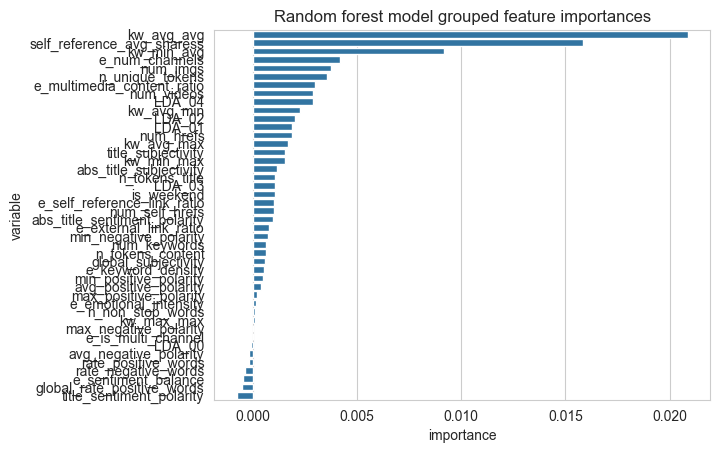

In [23]:
from sklearn.inspection import permutation_importance

rf_imp = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=prng,
    # scoring="neg_root_mean_squared_error"
)

grouped_var_imp = (pd.DataFrame(
        rf_imp.importances_mean,
        features.columns)
                      .sort_values(by = 0, ascending = False)
                      .reset_index()
                      .rename(columns={'index': 'variable', 0: 'imp'}))
grouped_var_imp['cumulative_imp'] = grouped_var_imp.imp.cumsum()

rf_fig = sns.barplot(
    data = grouped_var_imp,
    x="imp", y="variable")
rf_fig.set(title='Random forest model grouped feature importances', xlabel="importance", ylabel="variable")
plt.show()

Random Forrest w. SMOTE

In [24]:
import imblearn
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

max_depth = [int(x) for x in np.linspace(1, 100, num = 4)]
max_depth.append(None)

grid = {'max_features': [0.05, 0.3, 1],
        'criterion':['gini'],
        'max_depth': max_depth,
        'min_samples_split': [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
        }

rf_smote_search = GridSearchCV(
    RandomForestClassifier(random_state = prng, oob_score=True, n_estimators=500, bootstrap=True), 
    grid, 
    cv=5, 
    refit='roc_auc',
    scoring = ['roc_auc'], 
    verbose=True,
    # random_state=prng,
    n_jobs=-1)

rf_smote_model = imblearn.pipeline.Pipeline(
    [('over_sampling', RandomOverSampler(sampling_strategy=0.5, random_state=prng)),
     ("rf_smote", rf_smote_search)
     ], verbose=True
)

rf_smote_model.fit(X_train, y_train)
predictions_rf_smote = rf_smote_model.predict(X_val)
accuracy_score(y_val, predictions_rf_smote)

[Pipeline] ..... (step 1 of 2) Processing over_sampling, total=   0.0s
Fitting 5 folds for each of 135 candidates, totalling 675 fits
[Pipeline] .......... (step 2 of 2) Processing rf_smote, total=41.5min


0.8722152164775115

In [25]:
rf_smote_search.best_params_

{'criterion': 'gini',
 'max_depth': 34,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [26]:
update_summary(summary_df, 
               'RF SMOTE CV', 
               y_train, 
               rf_smote_model.predict_proba(X_train),
               y_val, 
               rf_smote_model.predict_proba(X_val), 
               y_test, 
               rf_smote_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929


GBM

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

max_depth = [int(x) for x in np.linspace(1, 100, num = 4)]
max_depth.append(None)

gbm_grid = {'max_features': [0.1, 0.5, 1.0],
        'max_depth': max_depth,
        "min_samples_leaf": [5, 10, 20],
        'l2_regularization': [0, 0.001, 0.01, 0.1],
        'class_weight': ['balanced', None],
        'max_iter': [100, 200, 500]
        }

gbm_search = GridSearchCV(
    HistGradientBoostingClassifier(random_state = prng), 
    gbm_grid, 
    cv=5, 
    refit='roc_auc',
    scoring = ['roc_auc'], 
    verbose=True,
    # random_state=prng,
    n_jobs=-1)

# RF as benchmark
gbm_model = Pipeline(
    [("gbm", gbm_search)
     ], verbose=True
)

gbm_model.fit(X_train, y_train)
predictions_gbm = gbm_model.predict(X_val)
accuracy_score(y_val, predictions_gbm)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[Pipeline] ............... (step 1 of 1) Processing gbm, total= 5.4min


0.6738125262715426

In [28]:
gbm_search.best_params_

{'class_weight': 'balanced',
 'l2_regularization': 0.1,
 'max_depth': 1,
 'max_features': 1.0,
 'max_iter': 500,
 'min_samples_leaf': 5}

In [29]:
update_summary(summary_df, 
               'GBM CV', 
               y_train, 
               gbm_model.predict_proba(X_train),
               y_val, 
               gbm_model.predict_proba(X_val), 
               y_test, 
               gbm_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003


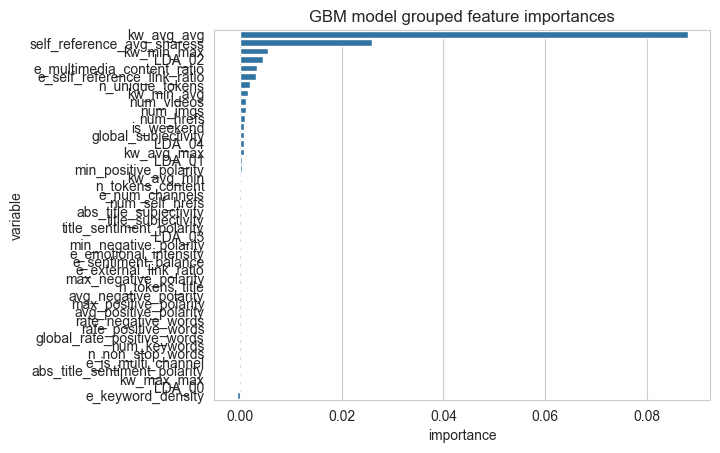

In [30]:
gbm_imp = permutation_importance(
    gbm_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=prng,
    # scoring="neg_root_mean_squared_error"
)

grouped_var_imp = (pd.DataFrame(
        gbm_imp.importances_mean,
        features.columns)
                      .sort_values(by = 0, ascending = False)
                      .reset_index()
                      .rename(columns={'index': 'variable', 0: 'imp'}))
grouped_var_imp['cumulative_imp'] = grouped_var_imp.imp.cumsum()

gbm_fig = sns.barplot(
    data = grouped_var_imp,
    x="imp", y="variable")
gbm_fig.set(title='GBM model grouped feature importances', xlabel="importance", ylabel="variable")
plt.show()

GBM w. SMOTE

In [31]:
import imblearn
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

max_depth = [int(x) for x in np.linspace(1, 100, num = 4)]
max_depth.append(None)

gbm_grid = {'max_features': [0.1, 0.5, 1.0],
        'max_depth': max_depth,
        "min_samples_leaf": [5, 10, 20],
        'l2_regularization': [0, 0.001, 0.01, 0.1],
        'class_weight': ['balanced', None],
        'max_iter': [100, 200, 500]
        }

gbm_smote_search = GridSearchCV(
    HistGradientBoostingClassifier(random_state = prng), 
    gbm_grid, 
    cv=5, 
    refit='roc_auc',
    scoring = ['roc_auc'], 
    verbose=True,
    # random_state=prng,
    n_jobs=-1)

# RF as benchmark
gbm_smote_model = imblearn.pipeline.Pipeline(
    [('over_sampling', RandomOverSampler(sampling_strategy=0.5, random_state=prng)),
     ("gbm_smote", gbm_smote_search)
     ], verbose=True
)

gbm_smote_model.fit(X_train, y_train)
predictions_gbm_smote = gbm_smote_model.predict(X_val)
accuracy_score(y_val, predictions_gbm_smote)

[Pipeline] ..... (step 1 of 2) Processing over_sampling, total=   0.0s
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[Pipeline] ......... (step 2 of 2) Processing gbm_smote, total=22.8min


0.8398486759142497

In [32]:
update_summary(summary_df, 
               'GBM SMOTE CV', 
               y_train, 
               gbm_smote_model.predict_proba(X_train),
               y_val, 
               gbm_smote_model.predict_proba(X_val), 
               y_test, 
               gbm_smote_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641


In [33]:
# save original X, y data
X_ori_sets = [X_train.copy(), X_val.copy(), X_test.copy()]
y_ori_sets = [y_train.copy(), y_val.copy(), y_test.copy()]

print(X_ori_sets[0].shape, X_ori_sets[1].shape, X_ori_sets[2].shape, y_ori_sets[0].shape, y_ori_sets[1].shape, y_ori_sets[2].shape)

(21407, 44) (2379, 44) (5947, 44) (21407,) (2379,) (5947,)


GBM no val

In [34]:
# split train, val, test again with engineered features
outcome = news_df["is_popular"]
features = news_df.drop(columns=exclude_cols)
prng = np.random.RandomState(20240408)
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=prng)

In [35]:
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
max_depth.append(None)

gbm_no_val_grid = {'max_features': [0.1, 0.5, 1.0],
        'max_depth': max_depth,
        "min_samples_leaf": [5, 10, 20],
        'l2_regularization': [0, 0.001, 0.01, 0.1],
        # 'class_weight': ['balanced', None],
        'max_iter': [100, 200, 500]
        }

gbm_no_val_search = GridSearchCV(
    HistGradientBoostingClassifier(random_state = prng), 
    gbm_grid, 
    cv=5, 
    refit='roc_auc',
    scoring = ['roc_auc'], 
    verbose=True,
    # random_state=prng,
    n_jobs=-1)

# RF as benchmark
gbm_no_val_model = Pipeline(
    [("gbm", gbm_no_val_search)
     ], verbose=True
)

gbm_no_val_model.fit(X_train, y_train)
predictions_gbm_no_val = gbm_no_val_model.predict(X_test)
accuracy_score(y_test, predictions_gbm_no_val)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[Pipeline] ............... (step 1 of 1) Processing gbm, total= 5.8min


0.6630233731293089

In [36]:
gbm_no_val_search.best_params_

{'class_weight': 'balanced',
 'l2_regularization': 0.01,
 'max_depth': 1,
 'max_features': 0.5,
 'max_iter': 500,
 'min_samples_leaf': 5}

In [37]:
update_summary(summary_df, 
               'GBM no val CV', 
               y_train, 
               gbm_no_val_model.predict_proba(X_train),
               y_train, 
               gbm_no_val_model.predict_proba(X_train),
               y_test, 
               gbm_no_val_model.predict_proba(X_test))
summary_df

,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985


Simple NN

In [38]:
# split train, val, test again with engineered features
outcome = news_df["is_popular"]
# features = news_df[high_performance_predictors]
features = news_df.drop(columns=exclude_cols)
prng = np.random.RandomState(20240408)
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=prng)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=prng)

print(X_train.shape, X_val.shape, X_test.shape)

(21407, 44) (2379, 44) (5947, 44)


In [39]:
from sklearn.preprocessing import MinMaxScaler

# normalize data
# scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = StandardScaler()
# scaler.fit(features)
columns_not_to_scale = [col for col in X_train.columns if col not in binary_cols]
scaler.fit(X_train[columns_not_to_scale])

X_train[columns_not_to_scale] = scaler.transform(X_train[columns_not_to_scale])
X_val[columns_not_to_scale] = scaler.transform(X_val[columns_not_to_scale])
X_test[columns_not_to_scale] = scaler.transform(X_test[columns_not_to_scale])

In [40]:
def plot_history(fit_history):
    plt.plot(fit_history['accuracy'], label='Training Accuracy')
    plt.plot(fit_history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [41]:
y_train_sigmoid, y_val_sigmoid, y_test_sigmoid = y_train, y_val, y_test

In [42]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    # Define weights
    false_positive_weight = 1.0
    false_negative_weight = 10000.0

    # Calculate binary cross entropy
    bce = tf.keras.losses.BinaryCrossentropy()

    # Calculate loss
    loss = bce(y_true, y_pred)

    # Calculate weighted loss
    weighted_loss = tf.where(tf.greater(y_true, y_pred), false_negative_weight * loss, false_positive_weight * loss)

    return tf.reduce_mean(weighted_loss)

Epoch 1/200
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 4s 521us/step - accuracy: 0.6942 - auc: 0.5744 - f1_score: 0.2194 - loss: 1203.3408 - val_accuracy: 0.7810 - val_auc: 0.6529 - val_f1_score: 0.2266 - val_loss: 1098.1217
Epoch 2/200
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 4s 503us/step - accuracy: 0.7527 - auc: 0.6674 - f1_score: 0.2194 - loss: 1057.8350 - val_accuracy: 0.7739 - val_auc: 0.6551 - val_f1_score: 0.2266 - val_loss: 1044.8766
Epoch 3/200
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 4s 517us/step - accuracy: 0.7582 - auc: 0.6876 - f1_score: 0.2194 - loss: 995.6713 - val_accuracy: 0.7705 - val_auc: 0.6617 - val_f1_score: 0.2266 - val_loss: 1003.0939
Epoch 4/200
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 4s 506us/step - accuracy: 0.7593 - auc: 0.6975 - f1_score: 0.2194 - loss: 950.9484 - val_accuracy: 0.7734 - val_auc: 0.6639 - val_f1_score: 0.2266 - val_loss: 970.9993
Epoch 5/200
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 4s 513us/step - accuracy: 0.7548 - auc: 0.7027 - f1_score: 0.2194 - loss: 916.3915 - val_accuracy: 0.7697 - 

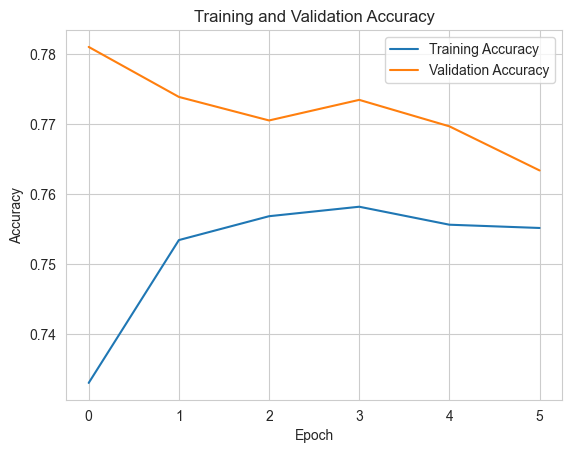

In [43]:
from keras.metrics import AUC, F1Score
from keras.models import Sequential
from keras.layers import Input, Dense, Normalization, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
import keras

# Build the simple fully connected single hidden layer network model
simple_model = Sequential([
    Input(shape=X_train.shape[1:]),
    # Normalization(axis=-1),
    Dense(256, activation='relu', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal'),   
    Dropout(0.4),
    Dense(1, activation='sigmoid', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal')
])

# Compile the model
opt = Adam(learning_rate=0.0001)
simple_model.compile(loss=custom_loss, optimizer=opt, metrics=[AUC(), 'accuracy', F1Score()])
# print(simple_model.summary())

# Fit the model
keras.utils.set_random_seed(20240408)  # for reproducibility
simple_history = simple_model.fit(X_train, y_train_sigmoid, validation_data=(X_val, y_val_sigmoid), epochs=200, batch_size=3, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], verbose=True)
# simple_history = simple_model.fit(X_train, y_train_sigmoid, validation_data=(X_test, y_test_sigmoid), epochs=300, batch_size=128, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], verbose=True)

# Evaluation of the model on the validation set
scores = simple_model.evaluate(X_val, y_val_sigmoid)
# scores = simple_model.evaluate(X_test, y_test_sigmoid)

plot_history(simple_history.history)

In [44]:
update_summary(summary_df, 
               'Sigmoid NN', 
               y_train_sigmoid,
               simple_model.predict(X_train), 
               y_val_sigmoid,
               simple_model.predict(X_val), 
               y_test_sigmoid,
               simple_model.predict(X_test),
               class1_only=True)
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793


In [45]:
# from keras.utils import plot_model
# 
# plot_model(simple_model, show_shapes=True, rankdir="LR")

In [46]:
from keras.utils import to_categorical

print(f"Dimension of y: {y_train.shape}")

# Convert target variables to categorical
num_classes = 2
y_sets = [y_train, y_test, y_val]
y_train, y_test, y_val = [to_categorical(y, num_classes=num_classes) for y in y_sets]
print(f"Dimension of y: {y_train.shape}")

Dimension of y: (21407,)
Dimension of y: (21407, 2)


In [47]:
def custom_categorical_loss(y_true, y_pred):
    # Define class weights
    class_weights = tf.constant([1.0, 10000.0])  # Assuming there are 2 classes with different weights

    # Calculate Categorical Crossentropy
    cat_crossentropy = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    # Calculate raw loss
    raw_loss = cat_crossentropy(y_true, y_pred)

    # Apply class weights
    weighted_loss = raw_loss * class_weights

    # Reduce along the class axis
    weighted_loss = tf.reduce_mean(weighted_loss, axis=-1)

    return weighted_loss

Epoch 1/300
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8665 - auc_1: 0.8944 - f1_score: 0.4717 - loss: 4704.0029 - val_accuracy: 0.8718 - val_auc_1: 0.9075 - val_f1_score: 0.4658 - val_loss: 3589.7629
Epoch 2/300
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8759 - auc_1: 0.9176 - f1_score: 0.4705 - loss: 3349.8887 - val_accuracy: 0.8718 - val_auc_1: 0.9095 - val_f1_score: 0.4658 - val_loss: 3008.3958
Epoch 3/300
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8757 - auc_1: 0.9206 - f1_score: 0.4694 - loss: 2835.3726 - val_accuracy: 0.8718 - val_auc_1: 0.9105 - val_f1_score: 0.4658 - val_loss: 2667.9644
Epoch 4/300
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8757 - auc_1: 0.9221 - f1_score: 0.4689 - loss: 2526.1255 - val_accuracy: 0.8718 - val_auc_1: 0.9114 - val_f1_score: 0.4658 - val_loss: 2446.8215
Epoch 5/300
7136/7136 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8759 - auc_1: 0.9226 - f1_score: 0.4689 - loss: 2325.1191 - val_ac

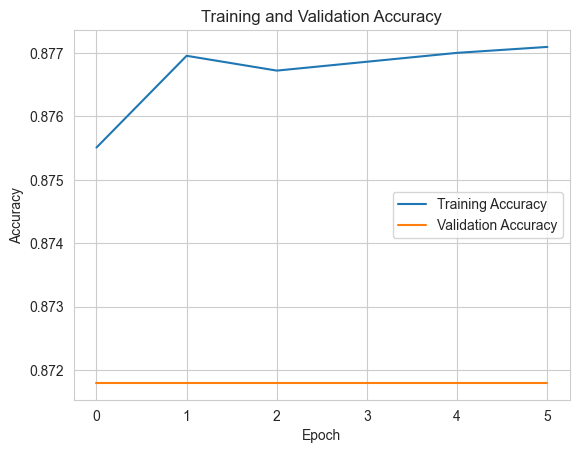

In [48]:
from keras.models import Sequential
from keras.layers import Input, Dense
import keras

# Build the simple fully connected single hidden layer network model
simple_softmax_model = Sequential([
    Input(shape=X_train.shape[1:]), 
    # Dropout(0.4), 
    # Normalization(),
    Dense(16384, activation='relu', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal'), 
    Dropout(0.4),
    Dense(2, activation='softmax')
])

# Compile the model
opt = Adam(learning_rate=0.00001)
simple_softmax_model.compile(loss=custom_categorical_loss, optimizer=opt, metrics=[AUC(), 'accuracy', F1Score()])
# print(simple_model.summary())

# Fit the model
keras.utils.set_random_seed(20240408)  # for reproducibility
simple_softmax_history = simple_softmax_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], batch_size=3)
# simple_softmax_history = simple_softmax_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], batch_size=128)

# Evaluation of the model on the validation set
scores = simple_softmax_model.evaluate(X_val, y_val)
# scores = simple_softmax_model.evaluate(X_test, y_test)

plot_history(simple_softmax_history.history)

In [49]:
# update_summary_score(summary_df, 
#                'Softmax NN', 
#                simple_softmax_model.evaluate(X_train, y_train)[2], 
#                scores[2], 
#                simple_softmax_model.evaluate(X_test, y_test)[2])
               # simple_softmax_model.evaluate(X_train, y_train)[1], 
               # scores[1], 
               # simple_softmax_model.evaluate(X_test, y_test)[1],
               # simple_softmax_model.evaluate(X_train, y_train)[3].numpy()[1], 
               # scores[3].numpy()[1], 
               # simple_softmax_model.evaluate(X_test, y_test)[3].numpy()[1])
update_summary(summary_df, 
               'Softmax NN', 
               y_ori_sets[0],
               simple_softmax_model.predict(X_train), 
               y_ori_sets[1],
               simple_softmax_model.predict(X_val), 
               y_ori_sets[2],
               simple_softmax_model.predict(X_test))
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


Epoch 1/500
5352/5352 ━━━━━━━━━━━━━━━━━━━━ 3s 506us/step - accuracy: 0.4496 - auc_2: 0.4447 - f1_score: 0.3807 - loss: 6674.5991 - val_accuracy: 0.4611 - val_auc_2: 0.4523 - val_f1_score: 0.3907 - val_loss: 5410.3906
Epoch 2/500
5352/5352 ━━━━━━━━━━━━━━━━━━━━ 3s 469us/step - accuracy: 0.4718 - auc_2: 0.4682 - f1_score: 0.3919 - loss: 6165.9956 - val_accuracy: 0.4830 - val_auc_2: 0.4854 - val_f1_score: 0.4025 - val_loss: 4955.8770
Epoch 3/500
5352/5352 ━━━━━━━━━━━━━━━━━━━━ 3s 487us/step - accuracy: 0.4917 - auc_2: 0.4991 - f1_score: 0.4017 - loss: 5661.8789 - val_accuracy: 0.5078 - val_auc_2: 0.5228 - val_f1_score: 0.4158 - val_loss: 4541.5547
Epoch 4/500
5352/5352 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step - accuracy: 0.5167 - auc_2: 0.5308 - f1_score: 0.4174 - loss: 5175.5161 - val_accuracy: 0.5343 - val_auc_2: 0.5641 - val_f1_score: 0.4255 - val_loss: 4166.1870
Epoch 5/500
5352/5352 ━━━━━━━━━━━━━━━━━━━━ 3s 472us/step - accuracy: 0.5479 - auc_2: 0.5648 - f1_score: 0.4332 - loss: 4708.4331 - v

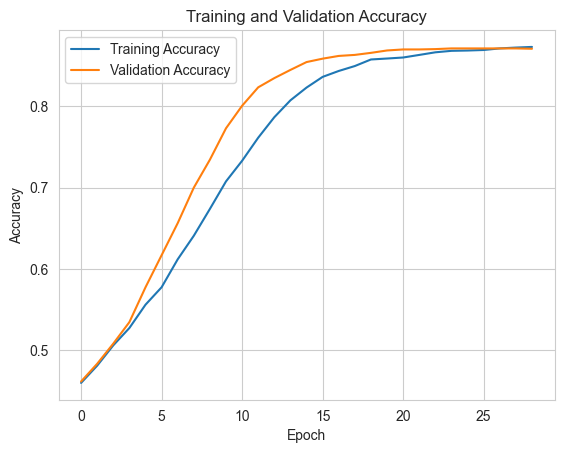

In [50]:
# Build the no hidden layer network model
no_hidden_model = Sequential([
    Input(shape=X_train.shape[1:]), 
    Dropout(0.4),
    Dense(2, activation='softmax')
])

# Compile the model
opt = Adam(learning_rate=0.00001)
no_hidden_model.compile(loss=custom_categorical_loss, optimizer=opt, metrics=[AUC(), 'accuracy', F1Score()])
# print(simple_model.summary())

# Fit the model
keras.utils.set_random_seed(20240408)  # for reproducibility
no_hidden_history = no_hidden_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], batch_size=4)

# Evaluation of the model on the validation set
scores = no_hidden_model.evaluate(X_val, y_val)

plot_history(no_hidden_history.history)

In [51]:
update_summary(summary_df, 
               'No Hidden Layer NN', 
               y_ori_sets[0],
               no_hidden_model.predict(X_train), 
               y_ori_sets[1],
               no_hidden_model.predict(X_val), 
               y_ori_sets[2],
               no_hidden_model.predict(X_test))
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


SMOTE

In [52]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

smt = RandomOverSampler(sampling_strategy=0.5, random_state=prng)
X_smote, y_smote = smt.fit_resample(X_train, y_sets[0])
# y_smote = to_categorical(y_smote, num_classes=num_classes)

In [53]:
def custom_loss_smote(y_true, y_pred):
    # Define weights
    false_positive_weight = 1.0
    false_negative_weight = 10000.0

    # Calculate binary cross entropy
    bce = tf.keras.losses.BinaryCrossentropy()

    # Calculate loss
    loss = bce(y_true, y_pred)

    # Calculate weighted loss
    weighted_loss = tf.where(tf.greater(y_true, y_pred), false_negative_weight * loss, false_positive_weight * loss)

    return tf.reduce_mean(weighted_loss)

Epoch 1/200
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 6s 564us/step - accuracy: 0.4790 - auc_3: 0.5792 - f1_score: 0.4974 - loss: 2670.9084 - val_accuracy: 0.5216 - val_auc_3: 0.6350 - val_f1_score: 0.2266 - val_loss: 1246.7109
Epoch 2/200
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 488us/step - accuracy: 0.5490 - auc_3: 0.6310 - f1_score: 0.4974 - loss: 2576.7178 - val_accuracy: 0.5624 - val_auc_3: 0.6534 - val_f1_score: 0.2266 - val_loss: 1217.8363
Epoch 3/200
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 505us/step - accuracy: 0.5748 - auc_3: 0.6474 - f1_score: 0.4974 - loss: 2533.8840 - val_accuracy: 0.5797 - val_auc_3: 0.6612 - val_f1_score: 0.2266 - val_loss: 1201.0601
Epoch 4/200
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 492us/step - accuracy: 0.5813 - auc_3: 0.6553 - f1_score: 0.4974 - loss: 2520.4365 - val_accuracy: 0.5855 - val_auc_3: 0.6651 - val_f1_score: 0.2266 - val_loss: 1185.3485
Epoch 5/200
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 492us/step - accuracy: 0.5937 - auc_3: 0.6669 - f1_score: 0.4974 - loss: 2486.4678 - v

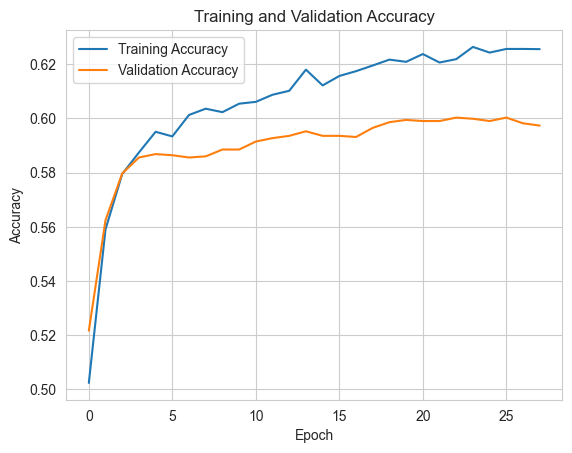

In [54]:
from sklearn.utils import compute_class_weight

# Build the simple fully connected single hidden layer network model
smote_model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(256, activation='relu', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal'),   
    Dropout(0.4),
    Dense(1, activation='sigmoid', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal')
])

# Compile the model
opt = Adam(learning_rate=0.00001)
smote_model.compile(loss=custom_loss_smote, optimizer=opt, metrics=[AUC(), 'accuracy', F1Score()])

# Fit the model
keras.utils.set_random_seed(20240408)  # for reproducibility
smote_history = smote_model.fit(X_smote, y_smote, validation_data=(X_val, y_ori_sets[1]), epochs=200, batch_size=3, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], verbose=True)

# Evaluation of the model on the validation set
scores = smote_model.evaluate(X_val, y_ori_sets[1])

plot_history(smote_history.history)

In [55]:
update_summary(summary_df, 
               'SMOTE NN', 
               y_ori_sets[0],
               smote_model.predict(X_train), 
               y_ori_sets[1],
               smote_model.predict(X_val), 
               y_ori_sets[2],
               smote_model.predict(X_test),
               class1_only=True)
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


SMOTE Softmax

In [56]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

smt = RandomOverSampler(sampling_strategy=0.5, random_state=prng)
X_smote_sm, y_smote_sm = smt.fit_resample(X_train, y_sets[0])
y_smote_sm = to_categorical(y_smote_sm, num_classes=num_classes)

Epoch 1/300
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 6s 572us/step - accuracy: 0.6034 - auc_4: 0.6300 - f1_score: 0.5192 - loss: 3832.7930 - val_accuracy: 0.8348 - val_auc_4: 0.8837 - val_f1_score: 0.5677 - val_loss: 2748.6975
Epoch 2/300
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 547us/step - accuracy: 0.6662 - auc_4: 0.7061 - f1_score: 0.5643 - loss: 3562.0137 - val_accuracy: 0.8293 - val_auc_4: 0.8850 - val_f1_score: 0.5787 - val_loss: 2678.6245
Epoch 3/300
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 520us/step - accuracy: 0.6739 - auc_4: 0.7251 - f1_score: 0.5735 - loss: 3463.0510 - val_accuracy: 0.8277 - val_auc_4: 0.8869 - val_f1_score: 0.5759 - val_loss: 2647.9050
Epoch 4/300
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 548us/step - accuracy: 0.6784 - auc_4: 0.7323 - f1_score: 0.5797 - loss: 3416.7815 - val_accuracy: 0.8260 - val_auc_4: 0.8884 - val_f1_score: 0.5704 - val_loss: 2627.5896
Epoch 5/300
9393/9393 ━━━━━━━━━━━━━━━━━━━━ 5s 525us/step - accuracy: 0.6778 - auc_4: 0.7367 - f1_score: 0.5776 - loss: 3383.1130 - v

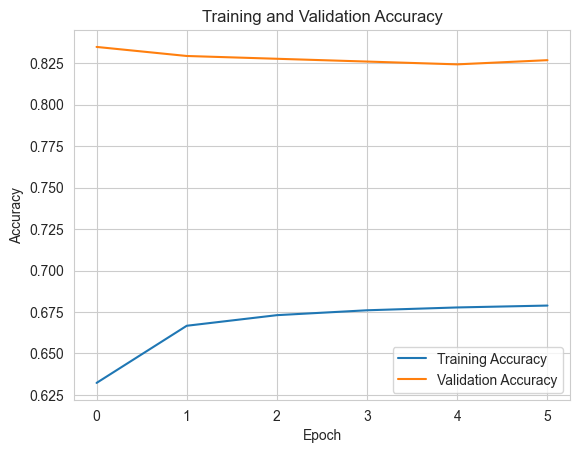

In [57]:
from keras.models import Sequential
from keras.layers import Input, Dense
import keras

# Build the simple fully connected single hidden layer network model
smote_softmax_model = Sequential([
    Input(shape=X_smote_sm.shape[1:]), 
    # Dropout(0.4), 
    # Normalization(),
    Dense(256, activation='relu', kernel_regularizer=l1(0.5), kernel_initializer='glorot_normal'), 
    Dropout(0.4),
    Dense(2, activation='softmax')
])

# Compile the model
opt = Adam(learning_rate=0.00001)
smote_softmax_model.compile(loss=custom_categorical_loss, optimizer=opt, metrics=[AUC(), 'accuracy', F1Score()])
# print(simple_model.summary())

# Fit the model
keras.utils.set_random_seed(20240408)  # for reproducibility
smote_softmax_history = smote_softmax_model.fit(X_smote_sm, y_smote_sm, validation_data=(X_val, y_val), epochs=300, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)], batch_size=3)

# Evaluation of the model on the validation set
scores = smote_softmax_model.evaluate(X_val, y_val)

plot_history(smote_softmax_history.history)

In [58]:
update_summary(summary_df, 
               'SMOTE Softmax NN', 
               y_ori_sets[0],
               smote_softmax_model.predict(X_train), 
               y_ori_sets[1],
               smote_softmax_model.predict(X_val), 
               y_ori_sets[2],
               smote_softmax_model.predict(X_test))
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


Hybrid Model

In [59]:
def get_hybrid_data(ml_model, dl_model, ml_data, dl_data):
    ml_pred = ml_model.predict_proba(ml_data)
    dl_pred = dl_model.predict(dl_data)
    if dl_model.layers[-1].units == 1:
        df = pd.DataFrame({
            'ml_model_0': ml_pred[:,0],
            'ml_model_1': ml_pred[:,1],
            'dl_model': dl_pred.flatten()
        })
    else:
        df = pd.DataFrame({
            'ml_model_0': ml_pred[:,0],
            'ml_model_1': ml_pred[:,1],
            'dl_model_0': dl_pred[:,0],
            'dl_model_1': dl_pred[:,1]
        })
    return df

In [86]:
X_train_hybrid, X_val_hybrid, X_test_hybrid = get_hybrid_data(gbm_model, smote_model, X_ori_sets[0], X_train), get_hybrid_data(gbm_model, smote_model, X_ori_sets[1], X_val), get_hybrid_data(gbm_model, smote_model, X_ori_sets[2], X_test)

# no regularisation needed so setting the parameter to very high value
lambdas = list(10**np.arange(-1, -3.01, -1/3))
n_obs = len(X_train_hybrid)
Cs_values = [1/(l*n_obs) for l in lambdas]
scoring='roc_auc'

# hybrid_model = LogisticRegressionCV(
#         Cs=Cs_values, 
#         penalty='elasticnet',
#         l1_ratios=[0, 0.3, 0.5],
#         refit=True, 
#         scoring=scoring, 
#         solver="saga", 
#         tol=1e-7, 
#         random_state=prng,
#         class_weight=None
#     )

hybrid_model = LogisticRegressionCV(
        Cs=Cs_values, 
        refit=True, 
        scoring=scoring, 
        solver="newton-cg", 
        tol=1e-7, 
        random_state=prng,
        class_weight=None
    )

# hybrid_model = LogisticRegressionCV(
#         Cs=Cs_values, 
#         penalty='l2',
#         refit=True, 
#         scoring=scoring, 
#         solver="liblinear", 
#         tol=1e-7, 
#         random_state=prng,
#         class_weight=None
#     )

hybrid_model.fit(X_train_hybrid, y_ori_sets[0])

update_summary(summary_df, 
               'Hybrid Model', 
               y_ori_sets[0], 
               hybrid_model.predict_proba(X_train_hybrid),
               y_ori_sets[1], 
               hybrid_model.predict_proba(X_val_hybrid), 
               y_ori_sets[2], 
               hybrid_model.predict_proba(X_test_hybrid))
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


In [87]:
hybrid_model.coef_

array([[-1.45958894,  1.45958894,  1.86538437]])

Voting Classifier

In [88]:
ml_models = {
    # 'FE Logit': fe_logit_model,
    # 'LASSO Logit': lasso_model, 
    # 'Random Forest CV': rf_model,
    # 'RF SMOTE CV': rf_smote_model,
    'GBM CV': gbm_model,
    'GBM no val': gbm_no_val_model,
    # 'GBM SMOTE CV': gbm_smote_model,
}
dl_models = {
    'Sigmoid NN': simple_model,
    'Softmax NN': simple_softmax_model,
    # 'No Hidden Layer NN': no_hidden_model,
    'SMOTE NN': smote_model
}

class CustomVotingClassifier:
    
    def __init__(self, ml_models: dict, dl_models: dict, voting='soft'):
        self.ml_models = ml_models
        self.dl_models = dl_models
        self.voting = voting
    
    def predict_proba(self, ml_data, dl_data):
        if 'Sigmoid NN' in self.dl_models.keys() or 'SMOTE NN' in self.dl_models.keys():
            return self.predict_proba_class1(ml_data, dl_data)
        else:
            class_0_pred = {}
            class_1_pred = {}
            for model_name, model in self.ml_models.items():
                model_pred = model.predict_proba(ml_data)
                class_0_pred[model_name] = model_pred[:,0]
                class_1_pred[model_name] = model_pred[:,1]
            for model_name, model in self.dl_models.items():
                model_pred = model.predict(dl_data)
                class_0_pred[model_name] = model_pred[:,0]
                class_1_pred[model_name] = model_pred[:,1]
            
            pred_0_df = pd.DataFrame.from_dict(class_0_pred)
            pred_1_df = pd.DataFrame.from_dict(class_1_pred)
            
            # pred_df = pd.DataFrame({
            #     0: pred_0_df.mean(axis=1).to_numpy(),
            #     1: pred_1_df.mean(axis=1).to_numpy()
            # })
            return np.vstack((pred_0_df.mean(axis=1).to_numpy(), pred_1_df.mean(axis=1).to_numpy())).T
    
    def predict_proba_class1(self, ml_data, dl_data):
        class_1_pred = {}
        for model_name, model in self.ml_models.items():
            model_pred = model.predict_proba(ml_data)
            class_1_pred[model_name] = model_pred[:,1]
        for model_name, model in self.dl_models.items():
            model_pred = model.predict(dl_data)
            if model.layers[-1].units == 1:
                class_1_pred[model_name] = model_pred.flatten()
            else:
                class_1_pred[model_name] = model_pred[:,1]
        
        pred_1_df = pd.DataFrame.from_dict(class_1_pred)
        
        # pred_df = pd.DataFrame({
        #     0: pred_0_df.mean(axis=1).to_numpy(),
        #     1: pred_1_df.mean(axis=1).to_numpy()
        # })
        return pred_1_df.mean(axis=1).to_numpy()
    
    def predict(self, ml_data, dl_data):
        model_pred = {}
        if self.voting == 'soft':
            pred_df = self.predict_proba(ml_data, dl_data)
            pred_df = pd.DataFrame({
                0: pred_df[:,0],
                1: pred_df[:,1]
            })
            pred_df = pred_df.idxmax(axis=1)
            return pred_df.to_numpy()
        elif self.voting == 'hard':
            for model_name, model in self.ml_models.items():
                model_pred[model_name] = model.predict(ml_data)
            for model_name, model in self.dl_models.items():
                model_pred[model_name] = np.argmax(model.predict(dl_data), axis=1)
            pred_df = pd.DataFrame.from_dict(model_pred)
            pred_df = pred_df.mode(axis=1)
            return pred_df.to_numpy()
        else:
            print('Invalid voting param!')

In [89]:
soft_voting_clf = CustomVotingClassifier(ml_models, dl_models)
# hard_voting_clf = CustomVotingClassifier(ml_models, dl_models, 'hard')
update_summary(summary_df, 
               'Soft Voting Classifier', 
               y_ori_sets[0], 
               soft_voting_clf.predict_proba(X_ori_sets[0], X_train),
               y_ori_sets[1], 
               soft_voting_clf.predict_proba(X_ori_sets[1], X_val), 
               y_ori_sets[2], 
               soft_voting_clf.predict_proba(X_ori_sets[2], X_test),
               class1_only=True)
# update_summary(summary_df, 
#                'Hard Voting Classifier', 
#                y_ori_sets[0], 
#                hard_voting_clf.predict_proba(X_ori_sets[0], X_train),
#                y_ori_sets[1], 
#                hard_voting_clf.predict_proba(X_ori_sets[1], X_val), 
#                y_ori_sets[2], 
#                hard_voting_clf.predict_proba(X_ori_sets[2], X_test))
summary_df

669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
669/669 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


,Model,Train AUC,Val AUC,Test AUC
0,Logit as Benchmark,0.6633,0.6565,0.6404
1,FE Logit,0.6780,0.6573,0.6540
2,LASSO Logit,0.6850,0.6647,0.6631
3,Random Forest CV,0.9995,0.6830,0.6947
4,RF SMOTE CV,1.0000,0.6814,0.6929
5,GBM CV,0.7271,0.6838,0.7003
6,GBM SMOTE CV,0.9965,0.6500,0.6641
7,GBM no val CV,0.7278,0.7278,0.6985
8,Sigmoid NN,0.7105,0.6706,0.6793
9,Softmax NN,0.7139,0.6794,0.6834


Predict

In [64]:
unseen_df = pd.read_csv('online-news-popularity-ceu-ml-2024/test.csv')

In [65]:
unseen_df, _ = feature_engineer(unseen_df)

In [66]:
exclude_cols_test = exclude_cols.copy()

In [67]:
if 'is_popular' in exclude_cols_test:
    exclude_cols_test.remove('is_popular')
unseen_features = unseen_df.drop(columns=exclude_cols_test)
predictions = gbm_model.predict_proba(unseen_features)[:,1]
predictions

array([0.64251239, 0.69288959, 0.41026993, ..., 0.40438329, 0.4443306 ,
       0.31544862])

In [69]:
if 'is_popular' in exclude_cols_test:
    exclude_cols_test.remove('is_popular')
unseen_features = unseen_df.drop(columns=exclude_cols_test)
# unseen_features = unseen_df[high_performance_predictors]
unseen_features[columns_not_to_scale] = scaler.transform(unseen_features[columns_not_to_scale])
predictions = smote_model.predict(unseen_features)
# predictions = weighted_deep3_model.predict(unseen_features)
# predictions = predictions[:, 1]
# predictions[:30]
predictions

310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


array([[0.5721589 ],
       [0.7802141 ],
       [0.4041058 ],
       ...,
       [0.40697464],
       [0.44573197],
       [0.35443932]], dtype=float32)

In [79]:
if 'is_popular' in exclude_cols_test:
    exclude_cols_test.remove('is_popular')
unseen_features = unseen_df.drop(columns=exclude_cols_test)
X_ml_unseen = unseen_features.copy()
X_dl_unseen = unseen_features.copy()
X_dl_unseen[columns_not_to_scale] = scaler.transform(X_dl_unseen[columns_not_to_scale])
predictions = hybrid_model.predict_proba(get_hybrid_data(gbm_model, smote_model, X_ml_unseen, X_dl_unseen))[:,1]
# predictions = soft_voting_clf.predict_proba(X_ml_unseen, X_dl_unseen)
predictions

310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step


array([0.18484411, 0.27914561, 0.07760747, ..., 0.07676466, 0.09126972,
       0.0549531 ])

In [80]:
prediction_df = pd.DataFrame({
    'article_id': unseen_df.article_id,
    'score': predictions.flatten()
})
# prediction_df[(prediction_df.score > 0.6)]
prediction_df.to_csv('submission.csv', index=False)